# Test grid extrapolation

This notebook diplays rectifcation grid interpolation and extrapolation

## Notebook parameters

Those parameters need to be set before running the notebook.

In [1]:
import os
# path to shareloc test data
os.environ["TESTPATH"] = "/work/OT/siqi/guinetj/ShareLoc/shareloc/valid"

# Read rectification grid 

In [2]:
grid_filename = os.path.join(os.environ["TESTPATH"],"rectification_grids", "left_epipolar_grid_ventoux.tif")

## Imports

In [3]:
import math
from matplotlib import pyplot as plt



## instantiate rectification grid 

In [5]:
from shareloc.rectification.rectification_grid import rectification_grid
rectif_grid = rectification_grid(grid_filename)

sample points

In [6]:
print(rectif_grid.points)

(array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.,
       330., 360., 390., 420., 450., 480., 510., 540., 570., 600., 630.]), array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.,
       330., 360., 390., 420., 450., 480., 510., 540., 570., 600., 630.]))


In [9]:
print(rectif_grid.row_positions)

[[5034.15625    5026.37255859 5018.58935547 5010.80566406 5003.02197266
  4995.23828125 4987.45507812 4979.67138672 4971.88769531 4964.10449219
  4956.32080078 4948.53759766 4940.75390625 4932.97021484 4925.18701172
  4917.40332031 4909.62011719 4901.83691406 4894.05322266 4886.27001953
  4878.48632812 4870.703125  ]
 [5063.12890625 5055.34521484 5047.56201172 5039.77832031 5031.99462891
  5024.2109375  5016.42773438 5008.64404297 5000.86035156 4993.07714844
  4985.29345703 4977.51025391 4969.7265625  4961.94335938 4954.15966797
  4946.37646484 4938.59277344 4930.80957031 4923.02587891 4915.24267578
  4907.45947266 4899.67578125]
 [5092.1015625  5084.31787109 5076.53466797 5068.75097656 5060.96728516
  5053.18408203 5045.40039062 5037.61669922 5029.83349609 5022.04980469
  5014.26611328 5006.48291016 4998.69921875 4990.91601562 4983.13232422
  4975.34912109 4967.56542969 4959.78222656 4951.99853516 4944.21533203
  4936.43212891 4928.6484375 ]
 [5121.07421875 5113.29101562 5105.50732422

In [11]:
print(rectif_grid.interpolate([0,30]))

[[5596.80859375 5026.37255859]]


In [93]:
import numpy as np
index = np.arange(-50,50,1)
positions = np.full([index.size,2],30.0)
positions[:,1] = index

In [94]:
interpolated_positions=rectif_grid.interpolate(positions)

In [95]:
from shareloc.math_utils import interpol_bilin_vectorized


(nc,nl) = rectif_grid.row_positions.shape
mat = np.zeros((1,nc,nl)) 
mat[0,:,:] = rectif_grid.row_positions
interpol_shareloc = interpol_bilin_vectorized([mat],nl,nc,positions[:,0] / 30.0,positions[:,1]/30.)
print(interpol_shareloc)

[array([[5076.10172526, 5075.84226888, 5075.5828125 , 5075.32335612,
        5075.06389974, 5074.80444336, 5074.54498698, 5074.2855306 ,
        5074.02607422, 5073.76661784, 5073.50716146, 5073.24770508,
        5072.9882487 , 5072.72879232, 5072.46933594, 5072.20987956,
        5071.95042318, 5071.6909668 , 5071.43151042, 5071.17205404,
        5070.91259766, 5070.65314128, 5070.3936849 , 5070.13422852,
        5069.87477214, 5069.61531576, 5069.35585938, 5069.09640299,
        5068.83694661, 5068.57749023, 5068.31803385, 5068.05857747,
        5067.79912109, 5067.53966471, 5067.28020833, 5067.02075195,
        5066.76129557, 5066.50183919, 5066.24238281, 5065.98292643,
        5065.72347005, 5065.46401367, 5065.20455729, 5064.94510091,
        5064.68564453, 5064.42618815, 5064.16673177, 5063.90727539,
        5063.64781901, 5063.38836263, 5063.12890625, 5062.86944987,
        5062.60999349, 5062.35053711, 5062.09108073, 5061.83162435,
        5061.57216797, 5061.31271159, 5061.0532

In [101]:
print(index[40])
print(interpolated_positions[40,:])
diff_max = np.max(np.abs(interpolated_positions[:,1] - interpol_shareloc[0][:].squeeze()))
print(diff_max)

-10
[5627.65576172 5065.72347005]
9.094947017729282e-13


In [98]:
interpol_OTB = np.loadtxt(os.path.join(os.environ["TESTPATH"],'interpol_OTB_ventoux_2.txt'))
diff_max_otb= np.max(np.abs(interpolated_positions[:,1] - interpol_OTB[:,3]))
print(diff_max_otb)

1.8189894035458565e-12


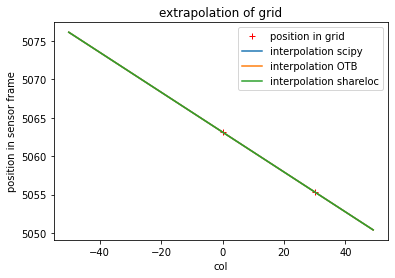

In [99]:

plt.plot(rectif_grid.points[0][0:2],rectif_grid.row_positions[1,0:2],'r+',label = 'position in grid')
plt.plot(index,interpolated_positions[:,1],label = 'interpolation scipy')
plt.plot(index,interpol_OTB[:,3],label = 'interpolation OTB')
plt.plot(index,interpol_shareloc[0][:].squeeze(),label = 'interpolation shareloc')
plt.legend()
plt.ylabel('position in sensor frame')
plt.xlabel('col')
plt.title('extrapolation of grid')

plt.savefig(os.path.join(os.environ["TESTPATH"],'extrapolation_2.png'))
plt.show()